# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [3]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [4]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [5]:
listahemisferio = []
for i in df.Latitude:
    if i >= 0:
        valor = "Norte"
    if i < 0:
        valor = "Sul"
    listahemisferio.append(valor)
#print (listahemisferio)  
df = df.assign(Hemisfério = listahemisferio)

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

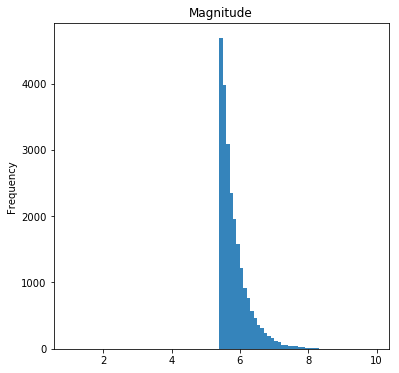

In [6]:
faixa = np.arange(1,10,0.1)
plot = df.Magnitude.plot.hist(bins=faixa, title="Magnitude", figsize=(6,6), alpha=0.9)

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [7]:
expon.pdf(x) = exp(-x)

expon.pdf(x, loc, scale)

SyntaxError: can't assign to function call (<ipython-input-7-c9a1450ec80c>, line 1)

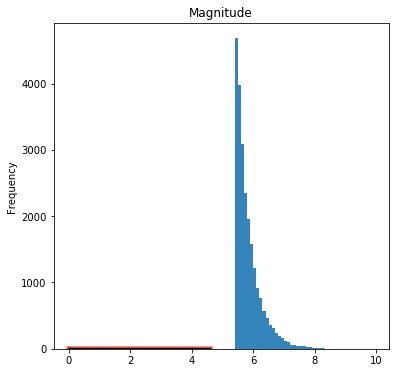

In [8]:
fig, ax = plt.subplots(1, 1)

plot = df.Magnitude.plot.hist(bins=faixa, title="Magnitude", figsize=(6,6), alpha=0.9)

x = np.linspace(expon.ppf(0.01),
    expon.ppf(0.99), 100)
ax.plot(x, expon.pdf(x),
    'r-', lw=5, alpha=0.6, label='expon pdf')

rv = expon()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = expon.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], expon.cdf(vals))
True

r = expon.rvs(size=1000)



Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [30]:
ct = pd.crosstab(df.Type, df.Hemisfério, normalize=True)*100
ct


Hemisfério,Norte,Sul
Type,,
Earthquake,44.716385,54.514779
Explosion,0.008543,0.008543
Nuclear Explosion,0.627883,0.119597
Rock Burst,0.000000,0.004271


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [31]:
chancenorte = ct.Norte.sum()
print("{}%".format (chancenorte))

45.352810524517345%


Explique o seu raciocínio

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [32]:
chanceNE = ct.Norte[2]*100/chancenorte
print("{}%".format (chanceNE))

1.3844415144094933%


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [33]:
ct2 = pd.crosstab(df.Hemisfério, df.Type, normalize="index")*100
ct2

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,98.596723,0.018836,1.384442,0.000000
Sul,99.757699,0.015632,0.218853,0.007816


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

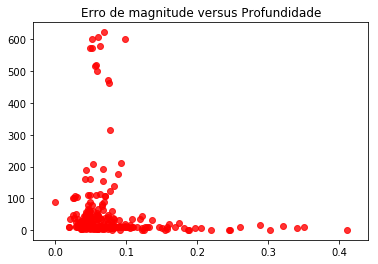

In [34]:
df.columns = df.columns.str.replace(" ", "_")


plt.scatter(df.Magnitude_Error, df.Depth, c='red', alpha=0.8)
plt.title('Erro de magnitude versus Profundidade')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [35]:
print("Correlação entre Erro de Magnitude e Profundidade:",np.corrcoef(df.Magnitude_Error,df.Depth)[1,1])

Correlação entre Erro de Magnitude e Profundidade: 1.0


Explique o que significa o valor da correlação calculada acima? 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

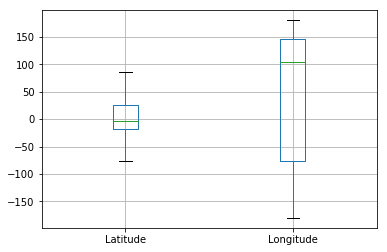

In [36]:
plot = df.boxplot(column=["Latitude", "Longitude"], figsize=(8,8))
plt.show()

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes
